In [1]:
import timetable_scheduler.solution
from timetable_scheduler import create_dataset, timing, process_image_manager
from timetable_scheduler.matrix_operators import matrix_cut_and_paste_translation, matrix_inner_translation, matrix_transposition, MatrixOperator


In [2]:
import numpy as np

@timing
def operator_time_measurement(matrix_operator: MatrixOperator, test_matrix: np.ndarray, iterations: int):
    for i in range(iterations):
        matrix_operator(test_matrix)

### Time complexity test setup
For every matrix operator perform time complexity tests for k different availability probability levels.
For every availability probability level perform m tests with n iterations each.

Let k = 3, m = 10, n = 1000.
My dataset of choice is the 5th term.

In [3]:
# k different availability probability levels
probability_levels = [0.5, 0.7, 0.9]
# m tests and n iterations
m = 10
n = 1000
dataset = 5

matrix_operators = [matrix_cut_and_paste_translation, matrix_inner_translation, matrix_transposition]
operator_labels = ['matrix_cut_and_paste_translation', 'matrix_inner_translation', 'matrix_transposition']

test_results = {operator_label: [] for operator_label in operator_labels}

for matrix_operator, operator_label in zip(matrix_operators, operator_labels):
    for probability_level in probability_levels:
        # test matrix setup
        create_dataset(term_id=dataset, room_p=probability_level, lecturer_p=probability_level)
        process_image_manager.reset_process_image()
        test_solution = timetable_scheduler.solution.Solution()
        test_matrix = test_solution.matrix
        # perform m tests with n iterations
        results = []
        for test in range(m):
            _, total_time = operator_time_measurement(matrix_operator, test_matrix, n)
            # save the average time for each run
            results.append(total_time / n)
        test_results[operator_label] += results


### Data Analysis

Studied properties:
* matrix operator runtimes
* the influence of matrix operators on the cost function
* the sequence of matrix operators



#### Matrix operator runtimes

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

operator_column = []
average_time_column = []
for operator_label, values in test_results.items():
    operator_column += [operator_label] * len(values)
    average_time_column += list(values)

df = pd.DataFrame(np.array([operator_column, average_time_column]).T, columns=['matrix operator', 'runtime'])
# get time in milliseconds
df['runtime'] = df['runtime'].astype('float') * 10e3
df.head()

,matrix operator,runtime
0,matrix_cut_and_paste_translation,15.179999
1,matrix_cut_and_paste_translation,16.620004
2,matrix_cut_and_paste_translation,18.650012
3,matrix_cut_and_paste_translation,16.029985
4,matrix_cut_and_paste_translation,14.852989


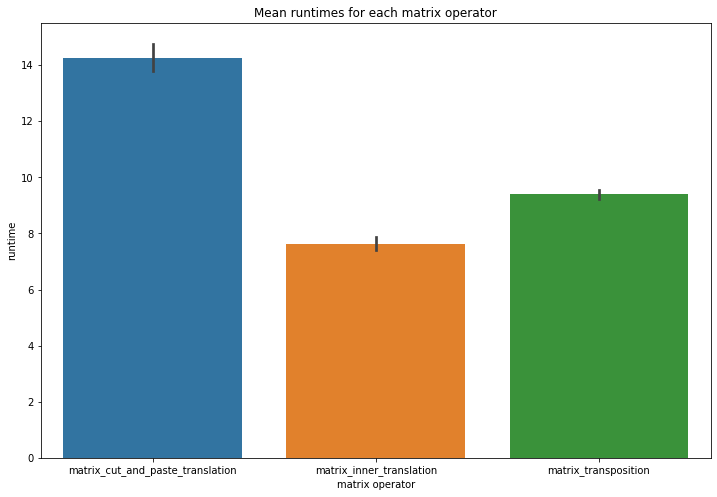

In [5]:
plt.figure(figsize=(12, 8))
sns.barplot(x='matrix operator', y='runtime', data=df)
plt.title('Mean runtimes for each matrix operator')
plt.show()

#### The influence of matrix operators on the cost function



In [6]:
import json

cooling_schedules = ["exponential", "bolzmann", "cauchy", "linear", "quadratic", "logarithmic"]


cooling_schedule_data = []
for cooling_schedule in cooling_schedules:
    with open(f'statistics/{cooling_schedule}_cooling_schedule.json', 'r') as file:
        data = json.load(file)
        for parameters, results in data.items():
            if cooling_schedule not in cooling_schedule_data.keys():
                cooling_schedule_data[cooling_schedule] = results
            else:
                cooling_schedule_data[cooling_schedule] += results

In [8]:
df = pd.DataFrame(cooling_schedule_data)
df

,exponential,bolzmann,cauchy,linear,quadratic,logarithmic
0,"{'initial_cost': 2068.2, 'best_cost': 1914.0, ...","{'initial_cost': 2234.8, 'best_cost': 2126.0, ...","{'initial_cost': 2517.2, 'best_cost': 2517.2, ...","{'initial_cost': 2021.1999999999998, 'best_cos...","{'initial_cost': 2112.4, 'best_cost': 2112.4, ...","{'initial_cost': 2101.2, 'best_cost': 2041.2, ..."
1,"{'initial_cost': 2341.4, 'best_cost': 2237.8, ...","{'initial_cost': 2255.2, 'best_cost': 2249.4, ...","{'initial_cost': 2342.8, 'best_cost': 2342.8, ...","{'initial_cost': 2135.2, 'best_cost': 2135.2, ...","{'initial_cost': 2142.4, 'best_cost': 2142.4, ...","{'initial_cost': 2272.0, 'best_cost': 2161.6, ..."
2,"{'initial_cost': 2283.2, 'best_cost': 2148.4, ...","{'initial_cost': 2207.8, 'best_cost': 2124.8, ...","{'initial_cost': 2172.4, 'best_cost': 2172.4, ...","{'initial_cost': 2325.2, 'best_cost': 2300.0, ...","{'initial_cost': 2309.8, 'best_cost': 2309.8, ...","{'initial_cost': 1989.6000000000001, 'best_cos..."
3,"{'initial_cost': 2145.0, 'best_cost': 2075.0, ...","{'initial_cost': 2307.4, 'best_cost': 2302.6, ...","{'initial_cost': 2113.4, 'best_cost': 2113.4, ...","{'initial_cost': 2404.8, 'best_cost': 2381.8, ...","{'initial_cost': 2094.8, 'best_cost': 2094.8, ...","{'initial_cost': 1968.0, 'best_cost': 1821.8, ..."
4,"{'initial_cost': 2290.8, 'best_cost': 2290.8, ...","{'initial_cost': 2217.3999999999996, 'best_cos...","{'initial_cost': 2157.6000000000004, 'best_cos...","{'initial_cost': 2457.2, 'best_cost': 2457.2, ...","{'initial_cost': 2124.6, 'best_cost': 2124.6, ...","{'initial_cost': 2141.0, 'best_cost': 2103.0, ..."
